<a href="https://colab.research.google.com/github/natkins14/FastF1-F1-Data-Analytics/blob/main/Qualifying_Results_Overview_Fastf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta

import fastf1
from fastf1 import plotting
from fastf1.core import Laps

#Enable Matplotlib patches for plotting timedelta values

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False, color_scheme=None)

2021 Spanish Grand Prix Qualifying Results

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

['HAM' 'VER' 'BOT' 'LEC' 'OCO' 'SAI' 'RIC' 'PER' 'NOR' 'ALO' 'STR' 'GAS'
 'VET' 'GIO' 'RUS' 'TSU' 'RAI' 'MSC' 'LAT' 'MAZ']
   Driver                LapTime           LapTimeDelta
0     HAM 0 days 00:01:16.741000        0 days 00:00:00
1     VER 0 days 00:01:16.777000 0 days 00:00:00.036000
2     BOT 0 days 00:01:16.873000 0 days 00:00:00.132000
3     LEC 0 days 00:01:17.510000 0 days 00:00:00.769000
4     OCO 0 days 00:01:17.580000 0 days 00:00:00.839000
5     SAI 0 days 00:01:17.620000 0 days 00:00:00.879000
6     RIC 0 days 00:01:17.622000 0 days 00:00:00.881000
7     PER 0 days 00:01:17.669000 0 days 00:00:00.928000
8     NOR 0 days 00:01:17.696000 0 days 00:00:00.955000
9     ALO 0 days 00:01:17.966000 0 days 00:00:01.225000
10    STR 0 days 00:01:17.974000 0 days 00:00:01.233000
11    GAS 0 days 00:01:17.982000 0 days 00:00:01.241000
12    VET 0 days 00:01:18.079000 0 days 00:00:01.338000
13    GIO 0 days 00:01:18.356000 0 days 00:00:01.615000
14    RUS 0 days 00:01:18.445000 0 da

INFO:fastf1.fastf1.req:Using cached data for driver_info


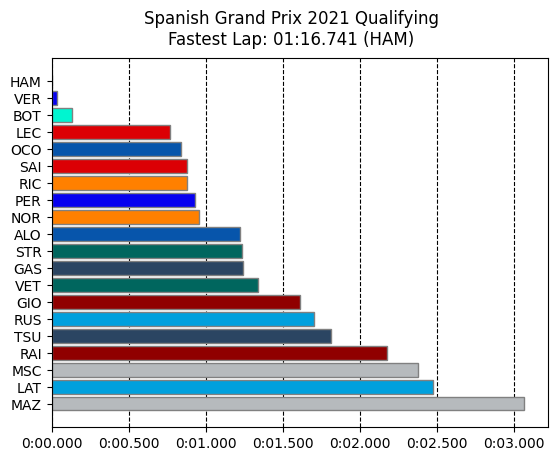

In [ ]:
session = fastf1.get_session(2021, 'Spanish Grand Prix', 'Q')
session.load()

# get an array of all drivers

drivers = pd.unique(session.laps['Driver'])
print(drivers)

list_fastest_laps = list()
for drv in drivers:
  drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
  list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps)
fastest_laps = fastest_laps.sort_values(by='LapTime')
fastest_laps = fastest_laps.reset_index(drop=True)

# plot the time differences, and subtract the fastest lap time from all other lap times

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

# create a list of team colors per lap to color our plot

team_colors = list()
for index, lap in fastest_laps.iterlaps():
  color = fastf1.plotting.get_team_color(lap['Team'], session=session)
  team_colors.append(color)

# we can now plot the data

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

#show fastest at the top
ax.invert_yaxis()

#draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle= '--', color='black', zorder=-1000)

# give plot a title
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
            f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

Analysis:


*   Hamilton fastest with a 1:16.741, less than a tenth ahead of Verstappen.
*   Bottas is a tenth or two behind, then Leclerc, Ocon, and Sainz who are approximately 5 to 7 tenths off.
- Ocon is an outlier in fifth, along with Perez down in 8th.
- Slowest competitor was Mazepin, who was 3 seconds off pole position.  



2024 Mexican Grand Prix Qualifying Results

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
events      WARNING 	Correcting user input 'Mexican Grand Prix' to 'Mexico City Grand Prix'
core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Mexico City Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fast

['SAI' 'VER' 'NOR' 'LEC' 'RUS' 'HAM' 'MAG' 'GAS' 'ALB' 'HUL' 'TSU' 'LAW'
 'ALO' 'STR' 'BOT' 'COL' 'PIA' 'PER' 'OCO' 'ZHO']


req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info


   Driver                LapTime           LapTimeDelta
0     SAI 0 days 00:01:15.946000        0 days 00:00:00
1     VER 0 days 00:01:16.171000 0 days 00:00:00.225000
2     NOR 0 days 00:01:16.260000 0 days 00:00:00.314000
3     LEC 0 days 00:01:16.265000 0 days 00:00:00.319000
4     RUS 0 days 00:01:16.356000 0 days 00:00:00.410000
5     HAM 0 days 00:01:16.651000 0 days 00:00:00.705000
6     MAG 0 days 00:01:16.886000 0 days 00:00:00.940000
7     GAS 0 days 00:01:16.892000 0 days 00:00:00.946000
8     ALB 0 days 00:01:16.988000 0 days 00:00:01.042000
9     HUL 0 days 00:01:16.995000 0 days 00:00:01.049000
10    TSU 0 days 00:01:17.129000 0 days 00:00:01.183000
11    LAW 0 days 00:01:17.162000 0 days 00:00:01.216000
12    ALO 0 days 00:01:17.168000 0 days 00:00:01.222000
13    STR 0 days 00:01:17.294000 0 days 00:00:01.348000
14    BOT 0 days 00:01:17.393000 0 days 00:00:01.447000
15    COL 0 days 00:01:17.558000 0 days 00:00:01.612000
16    PIA 0 days 00:01:17.597000 0 days 00:00:01

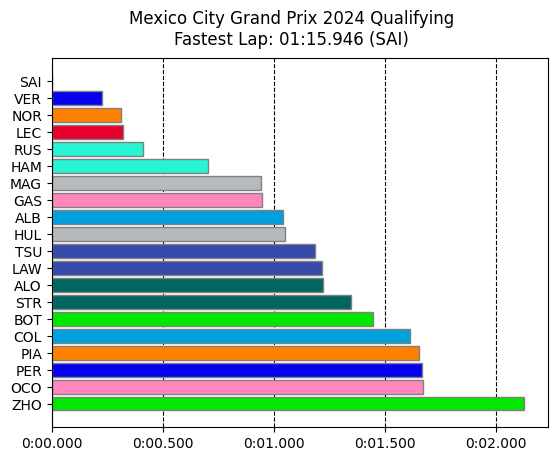

In [ ]:
session = fastf1.get_session(2024, 'Mexican Grand Prix', 'Q')
session.load()

# get an array of all drivers

drivers = pd.unique(session.laps['Driver'])
print(drivers)

list_fastest_laps = list()
for drv in drivers:
  drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
  list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps)
fastest_laps = fastest_laps.sort_values(by='LapTime')
fastest_laps = fastest_laps.reset_index(drop=True)

# plot the time differences, and subtract the fastest lap time from all other lap times

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

# create a list of team colors per lap to color our plot

team_colors = list()
for index, lap in fastest_laps.iterlaps():
  color = fastf1.plotting.get_team_color(lap['Team'], session=session)
  team_colors.append(color)

# we can now plot the data

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

#show fastest at the top
ax.invert_yaxis()

#draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle= '--', color='black', zorder=-1000)

# give plot a title
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
            f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

Analysis:


*   Sainz on pole with a 1:15.946, however, the top five were seperated by less than 5 tenths.
*   Significant outliers in the top ten were Gasly and Albon in 8th and 9th respectively, compared to their teammates down in the bottom 5 of the grid.
- Additionally, Perez down in 18th, compared to Verstappen in 2nd, however this is not suprising given his run of form in the latter part of the 2024 season.
- Zhou was the slowest competitor, approximately 2 seconds slower than Sainz.



2023 Monaco Grand Prix Qualifying Results

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Monaco Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for sessio

['VER' 'ALO' 'LEC' 'OCO' 'SAI' 'HAM' 'GAS' 'RUS' 'TSU' 'NOR' 'PIA' 'DEV'
 'ALB' 'STR' 'BOT' 'SAR' 'MAG' 'HUL' 'ZHO' 'PER']


/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: Fut

   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:11.365000        0 days 00:00:00
1     ALO 0 days 00:01:11.449000 0 days 00:00:00.084000
2     LEC 0 days 00:01:11.471000 0 days 00:00:00.106000
3     OCO 0 days 00:01:11.553000 0 days 00:00:00.188000
4     SAI 0 days 00:01:11.630000 0 days 00:00:00.265000
5     HAM 0 days 00:01:11.725000 0 days 00:00:00.360000
6     GAS 0 days 00:01:11.933000 0 days 00:00:00.568000
7     RUS 0 days 00:01:11.964000 0 days 00:00:00.599000
8     TSU 0 days 00:01:12.082000 0 days 00:00:00.717000
9     NOR 0 days 00:01:12.254000 0 days 00:00:00.889000
10    PIA 0 days 00:01:12.395000 0 days 00:00:01.030000
11    DEV 0 days 00:01:12.428000 0 days 00:00:01.063000
12    ALB 0 days 00:01:12.527000 0 days 00:00:01.162000
13    STR 0 days 00:01:12.623000 0 days 00:00:01.258000
14    BOT 0 days 00:01:12.625000 0 days 00:00:01.260000
15    SAR 0 days 00:01:13.113000 0 days 00:00:01.748000
16    MAG 0 days 00:01:13.270000 0 days 00:00:01

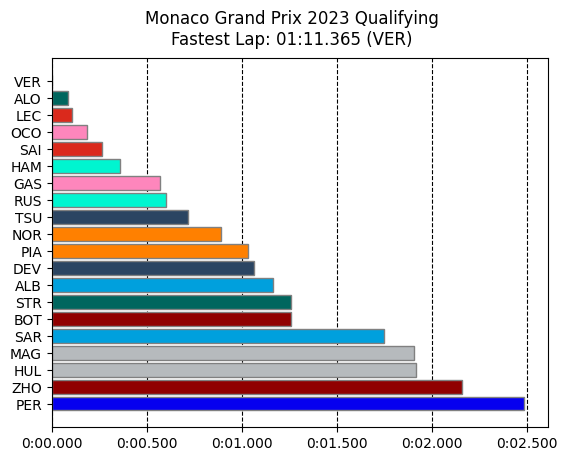

In [ ]:
session = fastf1.get_session(2023, 'Monaco Grand Prix', 'Q')
session.load()

# get an array of all drivers

drivers = pd.unique(session.laps['Driver'])
print(drivers)

list_fastest_laps = list()
for drv in drivers:
  drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
  list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps)
fastest_laps = fastest_laps.sort_values(by='LapTime')
fastest_laps = fastest_laps.reset_index(drop=True)

# plot the time differences, and subtract the fastest lap time from all other lap times

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

# create a list of team colors per lap to color our plot

team_colors = list()
for index, lap in fastest_laps.iterlaps():
  color = fastf1.plotting.get_team_color(lap['Team'], session=session)
  team_colors.append(color)

# we can now plot the data

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

#show fastest at the top
ax.invert_yaxis()

#draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle= '--', color='black', zorder=-1000)

# give plot a title
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
            f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

Analysis:


*   Verstappen on pole with a 1:11.365, followed by Alonso and Leclerc.
*   Top five seperated by less than half a second
- Outstanding result for Alonso in second, approximately a tenth off of Verstappen and just barely ousting Leclerc.
- Strong showing from Alpine as well, with Ocon and Gasly qualfying inside the top 10 in 4th and 7th respectively.
- Haas was the worst performer of the ten teams, qualifying 17th and 18th.

